In [64]:
#%matplotlib inline


In [1]:
import datetime
from pandas.core.indexes.datetimes import date
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels as sm
import sklearn as sl

!pip install pmdarima

import pmdarima as pm
from pmdarima.arima import auto_arima
from pmdarima.model_selection import train_test_split
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as multi

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as mutti

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.compat.scipy import _next_regular

import warnings
warnings.filterwarnings ("ignore")

from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
url = 'https://raw.githubusercontent.com/josealfonsocr/Proyecto-Skills/main/Walmart_Store_sales.csv'
df = pd.read_csv (url)
print('Shape of data',df.shape)
df.head(15)

Shape of data (6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [3]:
df.head()
#se ven los encabezados

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [68]:
#pd.options.display.float_format='{:,.2f}'.format
#cambiar el punto flotante

In [69]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,"6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00"
mean,23.00,"1,046,964.88",0.07,60.66,3.36,171.58,8.00
std,12.99,"564,366.62",0.26,18.44,0.46,39.36,1.88
min,1.00,"209,986.25",0.00,-2.06,2.47,126.06,3.88
25%,12.00,"553,350.10",0.00,47.46,2.93,131.74,6.89
50%,23.00,"960,746.04",0.00,62.67,3.44,182.62,7.87
75%,34.00,"1,420,158.66",0.00,74.94,3.73,212.74,8.62
max,45.00,"3,818,686.45",1.00,100.14,4.47,227.23,14.31


In [4]:
df.info()
#tipo de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df["Date"]=pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
df.Date.describe()

count                    6435
unique                    143
top       2010-05-02 00:00:00
freq                       45
first     2010-01-10 00:00:00
last      2012-12-10 00:00:00
Name: Date, dtype: object

In [7]:
df["Year"]= df['Date'].dt.year
df["Quarter"]= df['Date'].dt.quarter
df["Month"]= df['Date'].dt.month
df["Week"]= df['Date'].dt.week
df["Day"]= df['Date'].dt.day
df
#desglosar la fecha

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Week,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,17,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,4,12,48,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,2,7,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,2,8,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,2,5,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,3,9,39,28
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,2,5,19,10
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,4,12,50,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,4,10,42,19


In [8]:
group=df.groupby("Store").sum("Weekly_Sales")
group.reset_index(level=0, inplace=True)
group["Weekly_Sales"]=(group["Weekly_Sales"])
pd.options.display.float_format='{:,.2f}'.format
group
#"agrupar por tienda y por venta semanal

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Week,Day
0,1,"222,402,808.85",10,"9,767.87",460.42,"30,887.56","1,088.29",287568,357,926,3718,2238
1,2,"275,382,440.98",10,"9,754.94",460.42,"30,837.42","1,090.21",287568,357,926,3718,2238
2,3,"57,586,735.07",10,"10,215.09",460.42,"31,372.99","1,026.31",287568,357,926,3718,2238
3,4,"299,543,953.38",10,"8,902.23",460.03,"18,401.19",852.95,287568,357,926,3718,2238
4,5,"45,475,688.90",10,"9,925.65",460.42,"30,968.88",900.24,287568,357,926,3718,2238
5,6,"223,756,130.64",10,"9,967.10",460.42,"31,110.11",944.79,287568,357,926,3718,2238
6,7,"81,598,275.14",10,"5,680.00",463.54,"27,693.99","1,227.76",287568,357,926,3718,2238
7,8,"129,951,181.13",10,"8,939.50",460.42,"31,379.78",871.13,287568,357,926,3718,2238
8,9,"77,789,218.99",10,"9,691.85",460.42,"31,406.62",872.28,287568,357,926,3718,2238
9,10,"271,617,713.89",10,"10,330.49",511.36,"18,401.19","1,195.90",287568,357,926,3718,2238


In [9]:
sort_WeeklySales=group.sort_values('Weekly_Sales', ascending=False)
sort_WeeklySales

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Week,Day
19,20,"301,397,792.46",10,"7,929.55",488.72,"29,892.45","1,054.11",287568,357,926,3718,2238
3,4,"299,543,953.38",10,"8,902.23",460.03,"18,401.19",852.95,287568,357,926,3718,2238
13,14,"288,999,911.34",10,"8,264.11",488.72,"26,638.85","1,236.77",287568,357,926,3718,2238
12,13,"286,517,703.80",10,"7,678.69",469.92,"18,401.19","1,001.26",287568,357,926,3718,2238
1,2,"275,382,440.98",10,"9,754.94",460.42,"30,837.42","1,090.21",287568,357,926,3718,2238
9,10,"271,617,713.89",10,"10,330.49",511.36,"18,401.19","1,195.90",287568,357,926,3718,2238
26,27,"253,855,916.88",10,"8,195.49",511.70,"19,878.61","1,144.25",287568,357,926,3718,2238
5,6,"223,756,130.64",10,"9,967.10",460.42,"31,110.11",944.79,287568,357,926,3718,2238
0,1,"222,402,808.85",10,"9,767.87",460.42,"30,887.56","1,088.29",287568,357,926,3718,2238
38,39,"207,445,542.47",10,"10,095.42",460.42,"30,706.26","1,125.27",287568,357,926,3718,2238


In [10]:
Top_five=sort_WeeklySales[['Weekly_Sales', 'Store']][0:5:].reset_index(drop=True)
Top_five
#agrupar en semanas las 5 tiendas con mas ventas

,Weekly_Sales,Store
0,"301,397,792.46",20
1,"299,543,953.38",4
2,"288,999,911.34",14
3,"286,517,703.80",13
4,"275,382,440.98",2


In [77]:
group=df.groupby("Year").sum("Weekly_Sales")
group.reset_index(level=0, inplace=True)
group["Weekly_Sales"]=(group["Weekly_Sales"])
group
#agrupamiento por año

,Year,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Month,Week,Day
0,2010,49680,"2,288,886,120.41",180,"130,176.63","6,099.34","363,099.85","18,344.26",5715,15120,60750,34155
1,2011,53820,"2,448,200,007.35",180,"137,588.56","8,334.88","401,416.98","18,911.96",5940,15255,61110,36495
2,2012,44505,"2,000,132,859.35",90,"122,606.25","7,178.42","339,590.14","14,218.31",4410,11295,45450,30060


In [11]:
#con este script se pide a Python agrupar por Quarter
group=df.groupby("Quarter").sum("Weekly_Sales")
group.reset_index(level=0, inplace=True)
group["Weekly_Sales"]=(group["Weekly_Sales"])
group
#agrupa por cuartos

,Quarter,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,1,34155,"1,501,938,357.51",0,"78,120.10","4,928.01","254,578.11","11,918.73",2986470,3060,10080,22860
1,2,40365,"1,826,038,445.58",0,"110,697.65","6,045.35","301,045.76","14,055.84",3529305,8685,33795,26865
2,3,39330,"1,748,077,899.54",90,"122,241.53","5,781.35","293,952.91","13,574.42",3438810,13680,56070,28440
3,4,34155,"1,661,164,284.48",360,"79,312.16","4,857.92","254,530.18","11,925.55",2985975,16245,67365,22545


In [79]:
df.set_index('Store')
#la tienda como index

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Week,Day
Store,,,,,,,,,,,,
1,2010-05-02,"1,643,690.90",0,42.31,2.57,211.10,8.11,2010,2,5,17,2
1,2010-12-02,"1,641,957.44",1,38.51,2.55,211.24,8.11,2010,4,12,48,2
1,2010-02-19,"1,611,968.17",0,39.93,2.51,211.29,8.11,2010,1,2,7,19
1,2010-02-26,"1,409,727.59",0,46.63,2.56,211.32,8.11,2010,1,2,8,26
1,2010-05-03,"1,554,806.68",0,46.50,2.62,211.35,8.11,2010,2,5,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...
45,2012-09-28,"713,173.95",0,64.88,4.00,192.01,8.68,2012,3,9,39,28
45,2012-05-10,"733,455.07",0,64.89,3.98,192.17,8.67,2012,2,5,19,10
45,2012-12-10,"734,464.36",0,54.47,4.00,192.33,8.67,2012,4,12,50,10


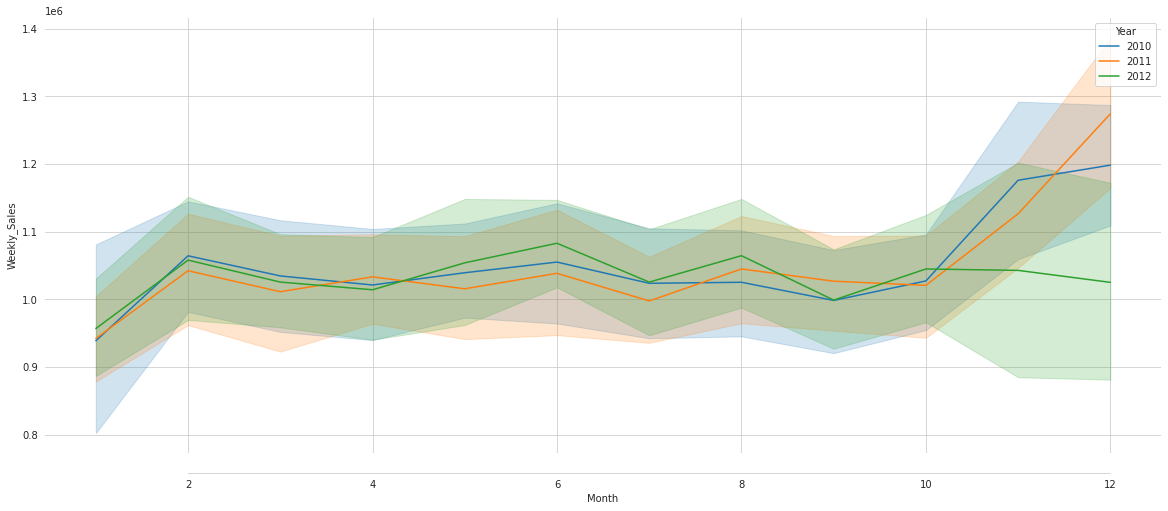

In [80]:
#con este script se pide a Python graficar las ventas por año y por mes
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='Month', y='Weekly_Sales', hue='Year', palette='tab10')
sns.set_style('whitegrid')
sns.despine(left=True, offset=20, trim=True)
plt.show()

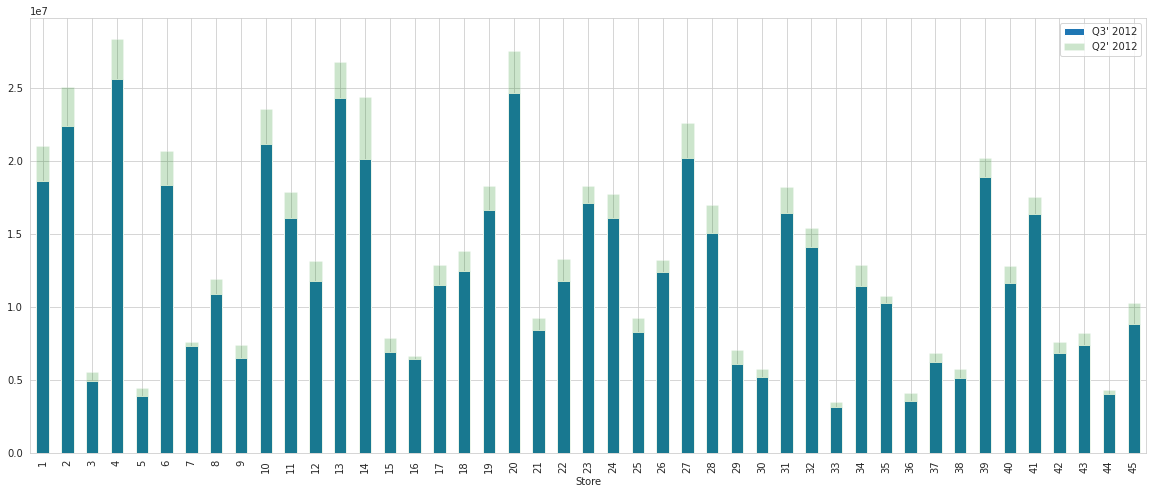

In [81]:
# Sales for second and third quarter in 2012
Q2_sales = df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
Q3_sales = df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Plotting the difference between sales for second and third quarterly
plt.figure(figsize=(20,8))
Q2_sales.plot(ax=Q3_sales.plot(kind ='bar'),kind='bar',color='g',alpha=0.2,legend=True)
plt.legend(["Q3' 2012", "Q2' 2012"])

In [82]:
Q2_sales= df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
Q3_sales= df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()
quarterly_growth_rate = ((Q3_sales - Q2_sales )/Q2_sales)*100
quarterly_growth_rate.sort_values(ascending=False).head()

Store
16   -2.79
7    -3.82
35   -4.66
26   -6.06
39   -6.40
Name: Weekly_Sales, dtype: float64

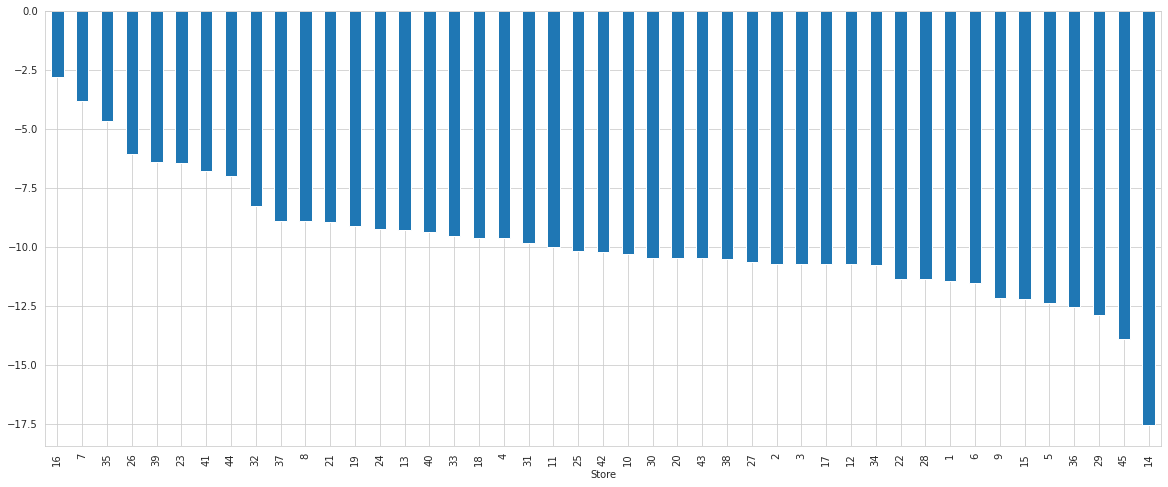

In [83]:
plt.figure(figsize=(20,8))
quarterly_growth_rate.sort_values(ascending=False).plot(kind='bar')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Week,Day
0,1,2010-05-02,"1,643,690.90",0,42.31,2.57,211.10,8.11,2010,2,5,17,2
1,1,2010-12-02,"1,641,957.44",1,38.51,2.55,211.24,8.11,2010,4,12,48,2
2,1,2010-02-19,"1,611,968.17",0,39.93,2.51,211.29,8.11,2010,1,2,7,19
3,1,2010-02-26,"1,409,727.59",0,46.63,2.56,211.32,8.11,2010,1,2,8,26
4,1,2010-05-03,"1,554,806.68",0,46.50,2.62,211.35,8.11,2010,2,5,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,"713,173.95",0,64.88,4.00,192.01,8.68,2012,3,9,39,28
6431,45,2012-05-10,"733,455.07",0,64.89,3.98,192.17,8.67,2012,2,5,19,10
6432,45,2012-12-10,"734,464.36",0,54.47,4.00,192.33,8.67,2012,4,12,50,10
6433,45,2012-10-19,"718,125.53",0,56.47,3.97,192.33,8.67,2012,4,10,42,19


# Preparación de los datos


In [167]:
df_prediction=df.dropna()

In [168]:
df_agrupada=df_prediction.groupby(['Date','Store','CPI'])['Weekly_Sales'].sum().reset_index()

In [169]:
Store1=df_agrupada[(df_agrupada.Store==1)]
steps=-1

In [170]:
df_prediction2=Store1.copy()

In [171]:
df_prediction2['Ventas_reales']=df_prediction2['Weekly_Sales'].shift(steps)
df_prediction2=df_prediction2.dropna()
# Se realiza una segunda columna que representara las ventas, nos servira de prediccion

In [172]:
df_prediction2.index=df_prediction2['Date']


In [173]:
df_prediction2['Date'] =pd.to_datetime(df_prediction2['Date'])

In [174]:
X=df_prediction2[['Store','CPI','Weekly_Sales']]
y=df_prediction2[['Ventas_reales']]

In [177]:
train_size=int(len(Store1) *0.8)
test_size = int(len(Store1)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

In [185]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(X['Weekly_Sales'],model='add');
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

ValueError: ignored

Split del modelo


#AutoArima

In [178]:
model_auto = auto_arima (train_y,
                         exogenous=train_X,
                         start_p=1, start_q=1,
                         max_p=7, max_q=7,
                         d=1, max_d=7,
                         trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3062.465, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3091.245, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3081.775, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3089.251, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3064.235, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3064.545, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3062.815, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3076.628, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3062.870, Time=0.06 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.054 seconds


In [179]:
model_auto

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

In [180]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1527.232
Date:                Fri, 04 Nov 2022   AIC                           3062.465
Time:                        18:59:25   BIC                           3073.374
Sample:                             0   HQIC                          3066.892
                                - 114                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2037.4763   1039.698      1.960      0.050      -0.294    4075.247
ar.L1          0.3227      0.067      4.838      0.000       0.192       0.453
ma.L1         -0.9664      0.041    -23.442      0.000      -1.047      -0.886
sigma2      3.127e+10      0.000   2.82e+14      0.000    3.13e+10    3.13e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                49.60
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             1.02
Prob(H) (two-sided):                  0.19   Kurtosis:                         5.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.67e+29. Standard errors may be unstable.
"""

#SARIMAX

In [181]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [182]:
model_SA = SARIMAX(train_y,seasonal_order=(0,1,0,52),exog=train_X, order=(0,1,2),
                   enforce_invertibility=False, enforce_stationarity=False)

In [183]:
results= model_SA.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                       Ventas_reales   No. Observations:                  114
Model:             SARIMAX(0, 1, 2)x(0, 1, [], 52)   Log Likelihood                -777.562
Date:                             Fri, 04 Nov 2022   AIC                           1567.125
Time:                                     18:59:34   BIC                           1579.488
Sample:                                          0   HQIC                          1571.940
                                             - 114                                         
Covariance Type:                               opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Store        -4.337e-07     32.953  -1.32e-08      1.000     -64.587      64.587
CPI           1.833e+04   8920.959      2.055      0.040     843.931    3.58e+04
Weekly_Sales    -0.2805      0.463     -0.606      0.545      -1.188       0.627
ma.L1           -0.3525      0.400     -0.881      0.378      -1.137       0.432
ma.L2           -0.1874      0.343     -0.547      0.584      -0.859       0.484
sigma2        2.176e+10      0.020   1.09e+12      0.000    2.18e+10    2.18e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                42.29
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.83
Prob(H) (two-sided):                  0.84   Kurtosis:                         6.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.45e+27. Standard errors may be unstable.
"""

# Predicción

In [65]:
%matplotlib inline

In [155]:
from pandas import DataFrame
import matplotlib.patches as mpatches
import statsmodels.api as sm
import pandas as pd

In [166]:
seas_d=sm.tsa.seasonal_decompose(X['Weekly_Sales'],model='add');
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

ValueError: ignored

In [157]:
descomposicion = sm.tsa.seasonal_decompose(['Ventas_reales'],
                                                  model='additive')  
fig = descomposicion.plot()

ValueError: ignored

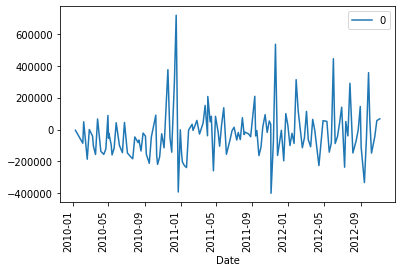

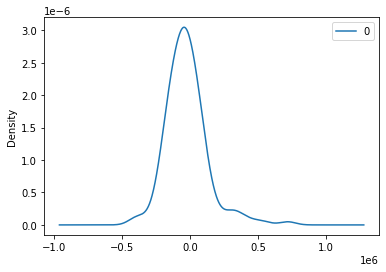

                0
count      142.00
mean   -24,459.48
std    156,057.26
min   -399,950.77
25%   -114,718.56
50%    -40,892.80
75%     47,068.52
max    716,837.40


In [117]:
residuals = DataFrame(results.resid)
cycle, trend = sm.tsa.filters.hpfilter(residuals)
residuals.plot()
plt.xticks(rotation=90)
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

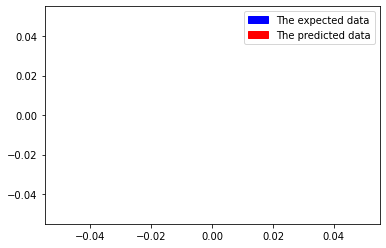

In [127]:
predictions = list()
plt.plot(df_test)
plt.plot(predictions, color='red')
red_patch = mpatches.Patch(color='red', label='The predicted data')
blue_patch = mpatches.Patch(color='blue', label='The expected data')
plt.legend(handles=[blue_patch,red_patch])
plt.show()

In [122]:
pd.DataFrame(y.iloc[size:, :])
predictions=pd.DataFrame(predictions)

ValueError: ignored

In [121]:
predictions=pd.DataFrame(predictions)

ValueError: ignored

In [109]:
df_auto_pred = pd.DataFrame (model_SA.predict(n_periods =len(df_test[start_date:end_date])),index = df_test.index)

NameError: ignored

count                     143
unique                    143
top       2010-01-10 00:00:00
freq                        1
first     2010-01-10 00:00:00
last      2012-12-10 00:00:00
Name: Date, dtype: object

In [112]:
y_pred = model_auto(n_periods=len(df_test['Weekly_Sales']))
y_pred = pd.DataFrame(y_pred,index = df_test['Weekly_Sales'].index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(df_train['Weekly_Sales'], label='Train')
plt.plot(df_test['Weekly_Sales'], label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

TypeError: ignored

In [43]:
df_auto_pred = pd.Dataframe(model_SA.predict(n_periods = df_test[start_date:end_date]),
                            exogenous = df_test[[]][],
                            index=df_test[].index)

TypeError: ignored

In [110]:
model_auto2 = auto_arima (df_train.Weekly_Sales, m= 5, max_order = None, max_p = 7, max_q=7, max_d=2, max_P=4, max_Q=4, max_D=2, maxiter=50, alpha=0.05, n_jobs=-1, trend='ct', information_criterion='oob', out_of_sample_size= int(len(df)*0.2)) 

In [111]:
model_auto2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 5148
Model:             SARIMAX(1, 1, 0)x(2, 0, [1], 5)   Log Likelihood              -69654.275
Date:                             Thu, 03 Nov 2022   AIC                         139322.549
Time:                                     19:25:06   BIC                         139368.373
Sample:                                          0   HQIC                        139338.586
                                            - 5148                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -916.1180   1.16e+04     -0.079      0.937   -2.36e+04    2.17e+04
drift          0.4853      4.315      0.112      0.910      -7.972       8.943
ar.L1         -0.3270      0.008    -40.677      0.000      -0.343      -0.311
ar.S.L5       -1.1391      0.034    -33.250      0.000      -1.206      -1.072
ar.S.L10      -0.2431      0.011    -21.140      0.000      -0.266      -0.221
ma.S.L5        0.9187      0.034     27.160      0.000       0.852       0.985
sigma2      3.993e+10   6.01e-05   6.65e+14      0.000    3.99e+10    3.99e+10
===================================================================================
Ljung-Box (L1) (Q):                  13.45   Jarque-Bera (JB):             84662.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.72e+33. Standard errors may be unstable.
"""

#Predicciones


In [130]:
model_auto = auto_arima (df_train.Weekly_Sales)

In [142]:
df_auto_pred = pd.DataFrame (model_auto.predict(n_periods =len(df_test[start_date:end_date])),index = df_test.index)

NameError: ignored

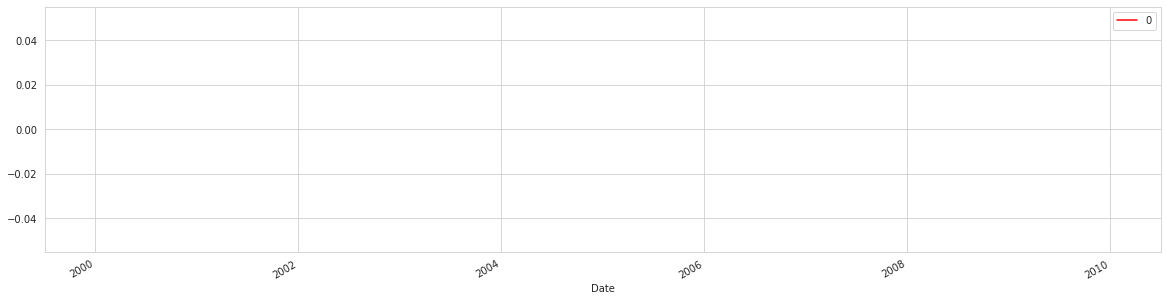

In [132]:
df_auto_pred.plot(figsize=(20,5), color = "red")
df_test.Weekly_Sales.plot(color = "blue")
plt.show()


ELISA

In [84]:
df.set_index("Date", inplace=True)
#se establece la fecha como índice


In [86]:
df.head()
#Encabezados con el Date como índice

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Week,Day
Date,,,,,,,,,,,,
2010-05-02,1,"1,643,690.90",0,42.31,2.57,211.10,8.11,2010,2,5,17,2
2010-12-02,1,"1,641,957.44",1,38.51,2.55,211.24,8.11,2010,4,12,48,2
2010-02-19,1,"1,611,968.17",0,39.93,2.51,211.29,8.11,2010,1,2,7,19
2010-02-26,1,"1,409,727.59",0,46.63,2.56,211.32,8.11,2010,1,2,8,26
2010-05-03,1,"1,554,806.68",0,46.50,2.62,211.35,8.11,2010,2,5,18,3


In [ ]:
df_comp=df_comp.asfreq("w")

In [ ]:
df_comp.isna().sum()

In [ ]:
df_comp ["WS"] = df_comp.Weekly_Sales

In [ ]:
df_comp.describe()

SPLIT 

In [ ]:
size = int(len(df_comp)*0.8)
#se hace un conjunto de entrenamiento dividiendo al 0.8 de la base total

In [ ]:
size
#se pide el tamaño del conjunto de 0.8

In [ ]:
df_train=df_comp.iloc[:size]

In [ ]:
df_train


In [ ]:
df_test = df_comp.iloc[size:]

In [ ]:
df_test

In [ ]:
df_train.tail()

In [ ]:
df_test.tail()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_train.WS.plot(figsize=(20,5))
#plt.ylim(3,4)
#plt.title("WSa", size = 24)
#plt.show()

In [ ]:
df_train["Day"]= pd.Date(df_train['Date']).day
df_train["Week"]= pd.Date(df_train['Date']).week
df_train['Month'] = pd.Date(df_train['Date']).month
df_train['Year'] = pd.Date(df_train['Date']).year
df

df_comp ["WS"] = df_comp.Weekly_Sales

In [ ]:
infer_datetime_format=True
df_comp["Day"]= pd.DatetimeIndex(df_comp['Date']).day
df_comp["Week"]= pd.DatetimeIndex(df_comp['Date']).week
df_comp['Month'] = pd.DatetimeIndex(df_comp['Date']).month
df_comp['Year'] = pd.DatetimeIndex(df_comp['Date']).year
df

In [ ]:
df_comp.tail (20)
# ver los últimos registros

In [ ]:
df_comp.isna()
#nulos?

In [ ]:
df_comp.isnull().sum()
#identificar valores nulos

In [ ]:
df_comp.Weekly_Sales.isna().sum()
#nulos en ventas semanales

In [ ]:
data_sort=df_comp.sort_values("Date")
data_sort
#se ordenan los datos en relación a las fechas

In [ ]:
#con la funcion groupby se inidca al sistema agrupar por tienda y por semana
group=df_comp.groupby("Store").sum("Weekly_Sales")

In [ ]:
group.reset_index(level=0, inplace=True)
group
#se cambia el index

In [ ]:
std = df_comp.groupby('Store')['Weekly_Sales'].std()
std = pd.DataFrame(std)
std_sort=std.sort_values('Weekly_Sales', ascending=False)
std_sort
#se obtiene la desviación

# Análisis exploratorio

In [ ]:
df_comp.Weekly_Sales.plot(figsize=(20,5),title = "Weekly_Sales")
plt.show()
#se analizan las ventas semanales de forma gráfica

In [ ]:
df_comp.Temperature.plot(figsize=(20,5),title = "Temperature")
plt.show()

In [ ]:
df_comp.Weekly_Sales.plot(figsize=(20,5),title = "Weekly_Sales")
df_comp.Fuel_Price.plot(figsize=(20,5), title = "Fuel_Price")
plt.title("weekly sales vs fuel price")
plt.show()

In [ ]:
df_comp.Weekly_Sales.plot(figsize=(20,5),title = "Weekly_Sales")
df_comp.Temperature.plot(figsize=(20,5), title = "Temperature")
plt.title("weekly sales vs temperature")
plt.show()

In [ ]:
import scipy.stats

In [ ]:
scipy.stats.probplot(df_comp.Weekly_Sales, plot = plt)
plt.title ("QQ Plot", size = 24)
plt.show()
#qq PLOT de los quartiles, no se distribuye normalmente

In [ ]:
df_comp.describe()

In [ ]:
total_sales= df_comp.groupby('Store')['Weekly_Sales'].sum().sort_values() 
plt.figure(figsize=(15,7))
plt.ticklabel_format( style='plain', axis='y')
plt.title('Ventas por cada tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas totales')
total_sales.plot(kind='bar');
# tienda con el maximo de ventas suma de las ventas semanales por tienda. Tienda X, Ventas Y

In [ ]:
df_std = pd.DataFrame(df_comp.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
df_std.head(1).index[0] , df_std.head(1).Weekly_Sales[df_std.head(1).index[0]] 
# tienda con más desviacion estandar. Se agrupo por tienda, se obtuvo la desviacion

In [ ]:
coef = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean()*100)
coef.head
# Coeficiente de desviación medio

In [ ]:
tercer_trimestre= df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum().sort_values()
plt.figure(figsize=(15,7))
tercer_trimestre.plot(kind='bar',legend=True)
plt.ticklabel_format( style='plain', axis='y')
plt.legend(["3-Trimestre' 2012"]);
#Crecimiento tercer trimestre 2012 por tienda

In [ ]:
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Día_del_trabajo =  ['10-9-2010', '9-9-2011', '7-9-2012']
Acción_de_gracias =  ['26-11-2010', '25-11-2011', '23-11-2012']
Navidad = ['31-12-2010', '30-12-2011', '28-12-2012']
#Definir días festivos

In [ ]:
infer_datetime_format=True 
Ventas_Super_Bowl= (pd.DataFrame(df.loc[df.Date.isin(Super_Bowl)]))['Weekly_Sales'].mean()
Ventas_Día_del_trabajo = (pd.DataFrame(df.loc[df.Date.isin(Día_del_trabajo)]))['Weekly_Sales'].mean()
Ventas_Acción_de_gracias = (pd.DataFrame(df.loc[df.Date.isin(Acción_de_gracias)]))['Weekly_Sales'].mean()
Ventas_Navidad = (pd.DataFrame(df.loc[df.Date.isin(Navidad)]))['Weekly_Sales'].mean()
Ventas_Super_Bowl,Ventas_Día_del_trabajo,Ventas_Acción_de_gracias,Ventas_Navidad

#Medias de ventas en días festivos

In [ ]:
Ventas_no_festivos = df[df['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()
Ventas_no_festivos
# Medias en días no festivos

In [ ]:
Promedio_ventas = {'Ventas_Super_Bowl' : Ventas_Super_Bowl,
              'Ventas_Día_del_trabajo': Ventas_Día_del_trabajo,
              'Ventas_Acción_de_gracias':Ventas_Acción_de_gracias,
              'Ventas_Navidad': Ventas_Navidad,
              'Ventas_no_festivos': Ventas_no_festivos}
Promedio_ventas 

In [ ]:
df["Year"].unique()
#ventas en a;os

In [ ]:

plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2010]["Month"],df[df.Year==2010]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2011]["Month"],df[df.Year==2011]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2012]["Month"],df[df.Year==2012]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()
# Ventas mensuales por año 

In [ ]:
ventas_mensuales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")
ventas_mensuales.plot()

# Quitar valores fuera de rango


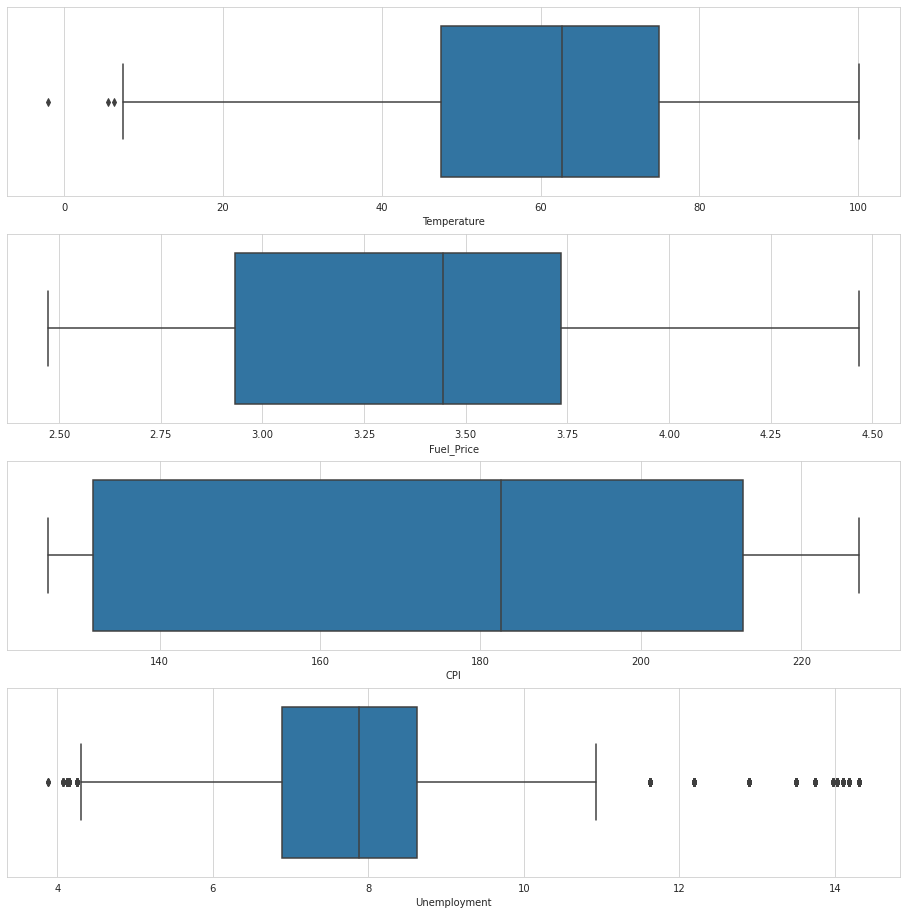

In [93]:
fig, axis = plt.subplots(4,figsize=(16,16))
X = df[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df[column],ax=axis[i])
# Checamos valores atipicos   

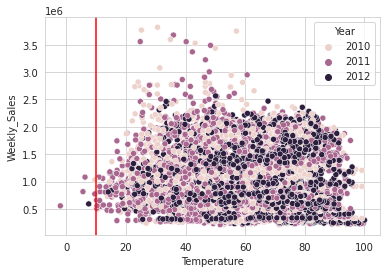

In [94]:
sns.scatterplot(data=df,x='Temperature', y='Weekly_Sales', hue = 'Year')
plt.axvline(x=10,color='r')

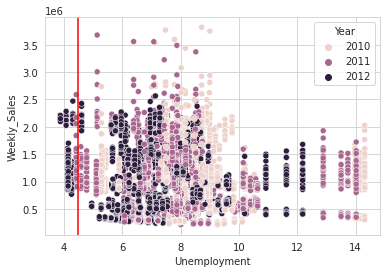

In [95]:
sns.scatterplot(data=df,x='Unemployment', y='Weekly_Sales', hue = 'Year')
plt.axvline(x=4.5,color='r')

In [96]:
df_limpia = df[(df['Unemployment']<10) & (df['Unemployment']>4.5) & (df['Temperature']>10)]
# Quitamos valores atipicos en una nueva función

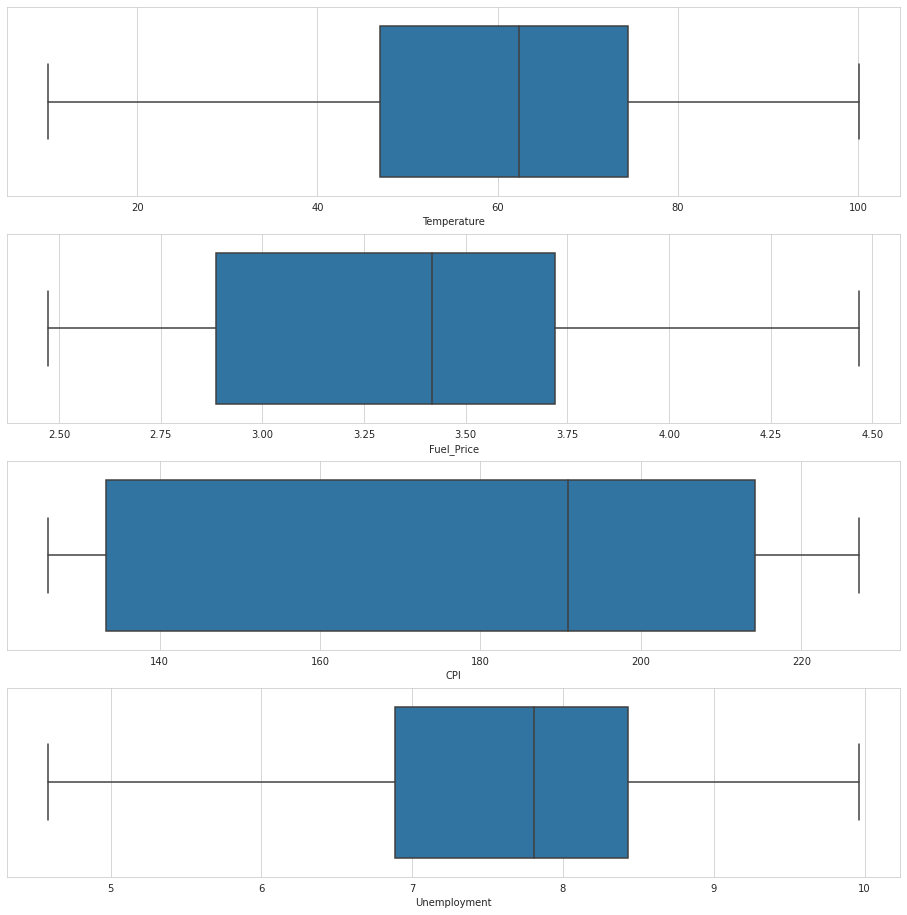

In [97]:
fig, axis = plt.subplots(4,figsize=(16,16))
X = df_limpia[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df_limpia[column],ax=axis[i])
# Verificamos ya no tener valores atipicos

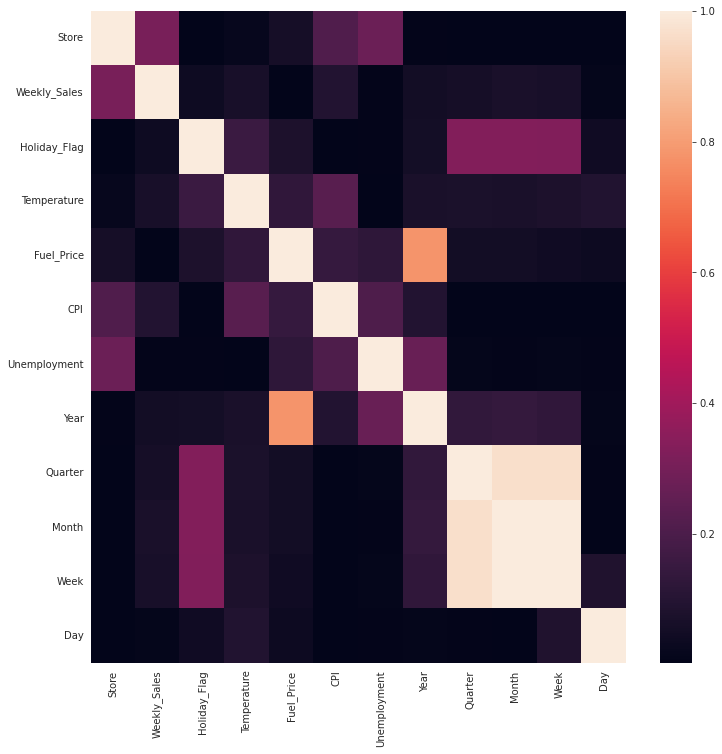

In [98]:
plt.figure(figsize = (12,12))
sns.heatmap(df_limpia.corr().abs())    # To see the correlations
plt.show()

# Modelos


In [ ]:
from pmdarima import auto_arima

In [ ]:
df_arima=df
df_arima=df_arima.set_index('Date')

In [ ]:
plt.figure(figsize=(16,9))
df_arima['Weekly_Sales'].plot()
plt.show()

In [ ]:
df_arimamonth = df_arima.resample('M').mean()

In [ ]:
plt.figure(figsize=(16,6))
df_arimamonth['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

In [ ]:
train_data = df_arimamonth[:int(0.7*(len(df_arimamonth)))] 
test_data = df_arimamonth[int(0.7*(len(df_arimamonth))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

In [ ]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [ ]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff (df_arimamonth['Weekly_Sales'])

In [ ]:
model_auto_arima = auto_arima(train_data['Weekly_Sales'], trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=2, max_D=0, d=1, 
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data['Weekly_Sales'])

In [ ]:
model_auto_arima.summary()

In [ ]:
y_pred = model_auto_arima.predict(n_periods=len(test_data['Weekly_Sales']))
y_pred = pd.DataFrame(y_pred,index = test_data['Weekly_Sales'].index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data['Weekly_Sales'], label='Train')
plt.plot(test_data['Weekly_Sales'], label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [ ]:
train = df_limpia['Weekly_Sales']
test = df_limpia['Weekly_Sales']
plt.plot(train)
plt.plot(test)
#plt.plot(test)

In [ ]:
plt.figure(figsize=(50,6))
df_limpia['Weekly_Sales'].plot()

In [ ]:
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

In [ ]:
X = df_limpia[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = df_limpia['Weekly_Sales']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
model.coef_

In [ ]:
X.mean()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')

plt.show()

In [ ]:
from scipy.stats import pearsonr

pearsonr(model.predict(X_test),y_test)

In [ ]:
from sklearn import metrics


In [ ]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:',metrics.r2_score(y_test, y_pred))



In [ ]:
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:',metrics.r2_score(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_pred,y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')

plt.show()

In [ ]:
pearsonr(y_pred,y_test)